In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import re 
import pickle as pkl
%matplotlib inline

import sys, os
sys.path.append(os.path.dirname(os.path.abspath('')))
sys.path.append(os.path.join(os.path.abspath(''),'..','scripts'))
sys.path.append(os.path.join(os.path.abspath(''),'..','src'))

from Experiment import *
from Analyzer import *
from Artist import *
artist = Artist()

In [3]:
results = Analyzer("vk").df

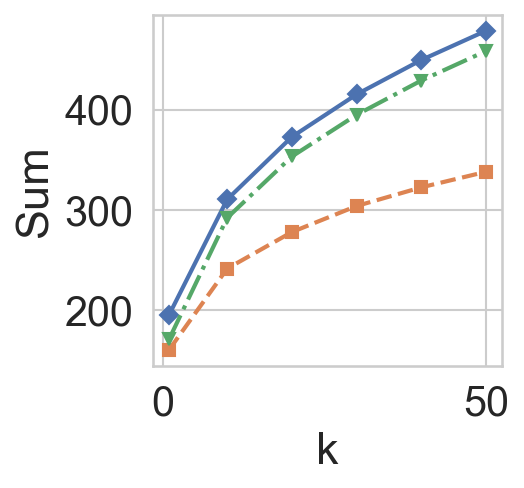

In [67]:
df = results
res = pd.DataFrame()
df['seeds'] = df['cmd'].apply(lambda x: int(re.match(r".* -s ([0-9]+) .*", x).group(1)))

all_params = ["seeds"]
defaults = {
    "seeds": 40
}

def fix_other_params(variable, df, defaults):
    for p in defaults:
        if p == variable:
            continue
        df = df[df[p] == defaults[p]]
    return df

param_names = {"seeds": "k", "weight_scale": "W"}
for param in all_params:
    for p in df[param].unique():
        dd = df[df[param] == p]
        dd = fix_other_params(param, dd, defaults)

        emf = dd[dd['mode'] == 5]
        emf_seq = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)
        res = res.append({"Active nodes": sum(emf_seq)/dd.iloc[0]['n'], param: p, "Solver": "SEMR"}, ignore_index=True)

        emf = dd[dd['mode'] == 0]
        emf_seq = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)
        res = res.append({"Active nodes": sum(emf_seq)/dd.iloc[0]['n'], param: p, "Solver": "SRNI"}, ignore_index=True)

        emf = dd[dd['mode'].isna()]
        for i in emf.index:
            res = res.append({"Active nodes": sum(emf.loc[i,'sequence'])/emf.loc[i,'n'], param: p, "Solver": "SRIM"}, ignore_index=True)
            
    #plot
#     sns.set(style="whitegrid", font_scale=1.4, rc={'axes.grid': True})
#     fig = plt.figure(figsize=(4,3), dpi=120)
#     ax = fig.add_subplot(1, 1, 1)
    fig = plt.figure(figsize=(3, 3.1), dpi=150)
    sns.set(style="whitegrid", font_scale=1.8, rc={'axes.grid': True})
    ax = fig.add_subplot(1, 1, 1)

    res = pd.DataFrame(res)
    res = res.sort_values(param)
    i = 0
    for s in res.groupby('Solver'):
        plt.plot(s[1][param],s[1]['Active nodes'],label=s[0],linestyle=artist.LINE_STYLES[i],marker=artist.markers[i],linewidth=2)
        i += 1
#     plt.legend()
    ax.set_xlabel(param_names[param])
    ax.set_ylabel("Sum")
    plt.show()

1201228.608350067


Text(0, 0.5, '$\\mathcal{I}$')

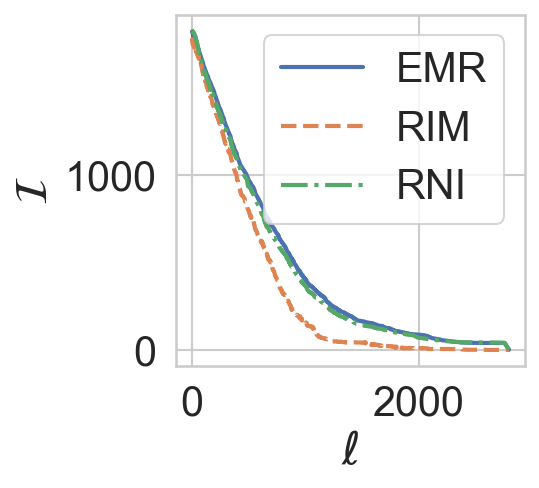

In [64]:
names = {"satgreedy": "SatGreedy", "all_greedy": "AllGreedy", "single_greedy": "SingleGreedy", "single_greedy_celf": "SingleGreedy CELF"}
# sns.set(style="whitegrid", font_scale=1.4, rc={'axes.grid': True})
# fig = plt.figure(figsize=(4,3), dpi=120)
# ax = fig.add_subplot(1, 1, 1)

fig = plt.figure(figsize=(3, 3.1), dpi=150)
sns.set(style="whitegrid", font_scale=1.8, rc={'axes.grid': True})
ax = fig.add_subplot(1, 1, 1)

# df = df[df['seeds'] == 40]

dd = df[df['seeds'] == 40]
defaults = {
    "seeds": 40
}
dd = fix_other_params('seeds', dd, defaults)
df = dd

emf = df[df['mode'] == 5]
emf_seq = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)

ax.plot(emf_seq, label="EMR", linestyle=artist.LINE_STYLES[0], linewidth=2)



others = df[df['solver_params'].isna()]
j = 0
for i in others.index:
    ax.plot(np.array(df.loc[i,"sequence"]), label= "RIM".format(names[df.loc[i,"solver"]]), linestyle=artist.LINE_STYLES[1], linewidth=2)
    j+=1
#     if j == 2:
#         break #two redundant results

rni = df[df['mode'] == 0]
rni_seq = np.amin([rni.loc[i,'sequence'] for i in rni.index],axis=0)
print(sum(rni_seq))
ax.plot(rni_seq, label="RNI", linestyle=artist.LINE_STYLES[2], linewidth=2)



# plt.xlim((0,1500))
# plt.ylim((0,800))
ax.legend()
plt.xlabel("$\ell$")
plt.ylabel(r'$\mathcal{I}$')

In [12]:
def get_adversary_sequences(df):
    listdic = df
    d = {}
    for el in listdic:
        for sname in el:
            if sname not in d:
                d[sname] = []
            d[sname].append(el[sname])
    return d

def moving_average(signal, period):
    buffer = [np.nan] * period
    for i in range(period,len(signal)):
        buffer.append(signal[i-period:i].mean())
    return buffer

/Users/au624601/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/au624601/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


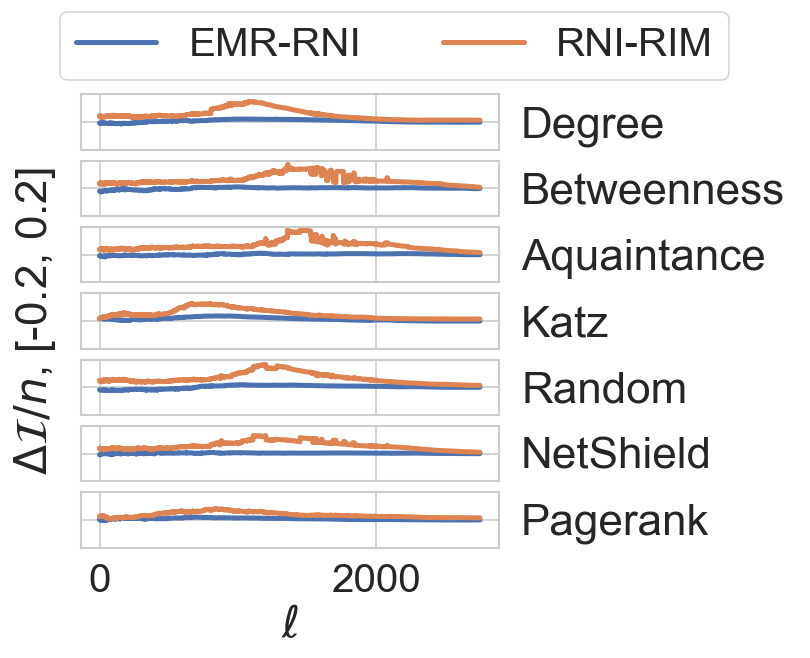

In [56]:
# plot lines 
sns.set(style="whitegrid", font_scale=2.2, rc={'axes.grid': True})
fig, axs = plt.subplots(7, 1, sharex=True, dpi=120, figsize=(4.5,5))
fig.subplots_adjust(wspace=0.07)

dd = df[df['seeds']==40]


emf = dd[dd['mode'].isna()]
assert(len(emf) == 1)
d = get_adversary_sequences(emf.iloc[0]['objective_per_adversary'])

i = 0
for s in dd['solver'].unique():
    if s == "single_greedy_celf":
        continue
    emf = dd[dd['mode'] == 5][dd['solver'] == s]
    assert(len(emf) == 1)
    emf_seq = np.array(emf.iloc[0]['sequence'])[:2750]/emf.iloc[0]['n']
    
    
    emf = dd[dd['mode'] == 0][dd['solver'] == s]
    assert(len(emf) == 1)
    rni_seq = np.array(emf.iloc[0]['sequence'])[:2750]/emf.iloc[0]['n']
    
    rim_seq = np.array(d[s])[:2750]

    axs[i].plot(emf_seq - rni_seq,label="EMR-RNI", linewidth=3)
    axs[i].plot(rni_seq - rim_seq,label="RNI-RIM", linewidth=3)
    axs[i].set_ylim((-0.2,0.2))
    axs[i].set_yticklabels([])
    axs[i].text(1.05, 0.23+i*0.195, s,
        horizontalalignment='left',
        verticalalignment='center',
        rotation=0,
        transform=ax.transAxes)
    i+=1

axs[3].set_ylabel("$\Delta \mathcal{I} / n$, [-0.2, 0.2]")
axs[0].legend(bbox_to_anchor=(-0.05, 2.4, 1.6, .102), loc=1, ncol=2, mode="expand", borderaxespad=0.)
axs[len(axs)-1].set_xlabel("$\ell$")
plt.show()

# Taking samples

In [81]:
fm = FileManager("manual_vk_graphs")

In [85]:
dpath = fm.get_data_path()
print(dpath)
seqs = []
for i in range(100):
#     graphs = pkl.load(open(os.path.join(dpath, "ego{}.pkl".format(i)),"rb"))
    try:
        graph = pkl.load(open(os.path.join(dpath, "ego{}.pkl".format(i)),"rb"))
        seq = pkl.load(open(os.path.join(dpath, "seq{}.pkl".format(i)),"rb"))
        seqs.append((len(graph), seq))
    except FileNotFoundError:
        break

/Users/au624601/active_projects/phd_robustness/data/robustFiles/manual_vk_graphs


In [86]:
all_pairs = []
for s in seqs:
    n = s[0]
    for i in range(len(s[1])):
        all_pairs.append((np.around(i/n, 2), s[1][i][1]/s[1][0][1], s[1][i][2]/s[1][0][1], s[1][i][3]/s[1][0][1]))
all_pairs = np.array(all_pairs)

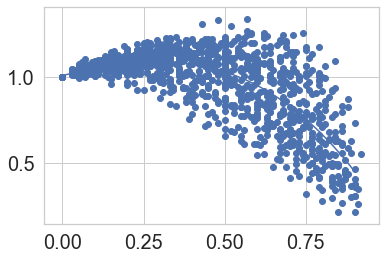

In [88]:
plt.scatter(all_pairs[:,0], all_pairs[:,1])
# all_pairs = pd.DataFrame(all_pairs)

# Plot the responses for different events and regions
# sns.lineplot(x=0, y=1,
#              hue="region", style="event",
#              data=all_pairs)
a = np.polynomial.polynomial.Polynomial.fit(all_pairs[:,0], all_pairs[:,1], 
                                            3, domain=None, rcond=None, full=False, w=None, window=(0,0.9)).convert().coef
xx = np.linspace(0, 0.9, 100)
fit = a[3]*xx**3 + a[2]*xx**2 + a[1]*xx + a[0]
plt.plot(xx, fit)

Text(0, 0.5, 'Sum/SEMR($\\ell=0$)')

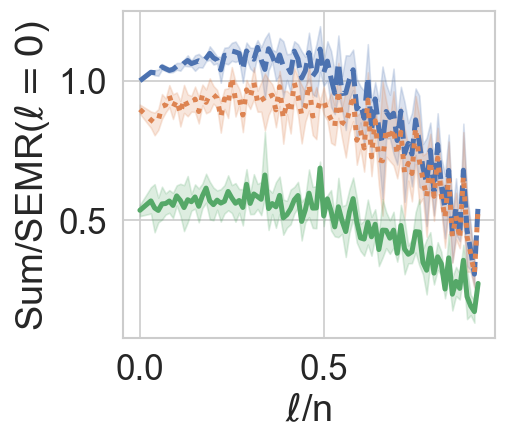

In [140]:
sns.set(style="whitegrid", font_scale=1.9, rc={'axes.grid': True})
markers_and_lines = [('--','o'),(':','v'),('-','^'),(':','D'),('-','s'),('--','h')]
fig = plt.figure(figsize=(4,3.6), dpi=120)
ax = fig.add_subplot(1, 1, 1)

# temp_df = pd.DataFrame({"$\ell$/n":all_pairs[:,0], "Sum/SEMR($\ell=0$)":all_pairs[:,1]})
# sns.lineplot(x="$\ell$/n", y="Sum/SEMR($\ell=0$)", data=temp_df, ax=ax, linewidth=3)

# # temp_df = pd.DataFrame({"$\ell$/n":all_pairs[:,0], "Sum/SEMR($\ell=0$)":all_pairs[:,2]})
# # sns.lineplot(x="$\ell$/n", y="Sum/SEMR($\ell=0$)", data=temp_df, ax=ax, linewidth=3)

# # temp_df = pd.DataFrame({"$\ell$/n":all_pairs[:,0], "Sum/SEMR($\ell=0$)":all_pairs[:,3]})
# # sns.lineplot(x="$\ell$/n", y="Sum/SEMR($\ell=0$)", data=temp_df, ax=ax, linewidth=3)


# mylist = list(all_pairs[:,1])
# N = 6
# cumsum, moving_aves = [0], []

# for i, x in enumerate(mylist, 1):
#     cumsum.append(cumsum[i-1] + x)
#     if i>=N:
#         moving_ave = (cumsum[i] - cumsum[i-N])/N
#         #can do stuff with moving_ave here
#         moving_aves.append(moving_ave)
# print(len(moving_aves), len(mylist))

# ax1 = sns.lineplot(all_pairs[:-N+1,0], moving_aves, ax=ax, linewidth=3)
sns.lineplot(all_pairs[:,0], all_pairs[:,1], ax=ax, linewidth=3)
sns.lineplot(all_pairs[:,0], all_pairs[:,2], ax=ax, linewidth=3)
sns.lineplot(all_pairs[:,0], all_pairs[:,3], ax=ax, linewidth=3)

ax.lines[0].set_linestyle("--")
ax.lines[1].set_linestyle(":")
ax.lines[2].set_linestyle("-")
# ax3.lines[0].set_linestyle("-")
# # plt.legend(loc='lower left', ncol=2)
plt.xlabel("$\ell$/n")
plt.ylabel("Sum/SEMR($\ell=0$)")